## Decision Tree (Classification)

This project was completed for training purposes. 

In this template we evaluate the data of target customers of a business in order to classify them and specify the target group for social media marketing campaign. 

The dataset for this template originates from superdatascience.com. 

We are going to build the logistic regression model based on **age** and **estimated salary** of the customers. 

The dependent variable of this analysis is **Purchased** which is a categorical data with 0 ( did not purchase the product) and 1 (did purchase the product). 

We'll start with reading the data, separating the independent and dependent variables.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
X = dataset.iloc[:,[2,3]].values #we are gonna build the model based on age and estimated salary
y = dataset.iloc[:, 4].values

In [4]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

C:\Users\rozhan.makhdoomi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\rozhan.makhdoomi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\rozhan.makhdoomi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
#fitting the logistic classifier to the training set
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

**Criterion in decision tree** 
the defualt parameter for the criterion is **gini**. But we will make the trees based on **entropy**

**Entropy** is a function that measures the quality of a split, so that at the final node of your tree would be as homogenous as possible. The more homogenous is the group of users the mopre entropy is reduced from the parent node to the child node.

So after the split if the entropy of the child node is zero. it means that child node is the fully homogenous groupd of users(only users from the same class). 

So the information gain happens after the split. meaning that entropy decreases after the split.

In [7]:
# predicting the test set 
y_pred=classifier.predict(X_test)

In [9]:
# making the confusion matrix (to evaluate a model)
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test, y_pred)

array([[62,  6],
       [ 3, 29]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


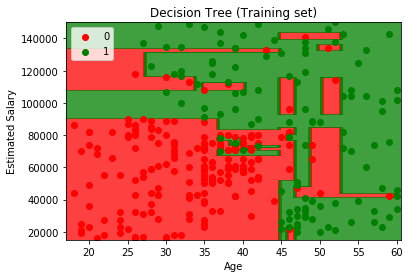

In [12]:
# visualising the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train    
#code of preparing the grid with the ranges. step 0.01 if you choosen 0.05 for example the graph would be less dense
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.5),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.5)) 
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)): #plot the points
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
 

#### Graph Interpretation

All the points that we can see in the graph are observatin points in our training set
 
Red points that showing the social network users that did not purchased the product
 
And the green points are showing the social netwrok users that purchased the product

**Prediction Regions** 
red and green areas

**Prediction Boundary**
The lines are the prediction boundary. They made some splits.

 
##### what our classifier telling us?
Classify the right users into the right category.
  
The marketing campaign can target the users in the green region since these are users that will actually buy the product. We can see that young users with the low estimated salary did not purchase the product.

The model looks like it's overfitting. 

This classifer is acting on the training set.

Next step is to test the learning experience that our classifier has learnt on the test set. 


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


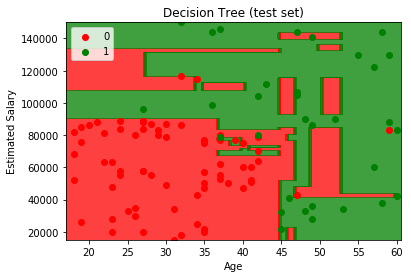

In [13]:
# visualising the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.5),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.5))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree (test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()